## Classifying happy and sad files

In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
import shutil

os.makedirs("/kaggle/working/Happy")
os.makedirs("/kaggle/working/Sad")

name = ('03-01-03-01-01-01',
        '03-01-03-01-01-02',
        '03-01-03-01-02-01',
        '03-01-03-01-02-02',
        '03-01-03-02-01-01',
        '03-01-03-02-01-02',
        '03-01-03-02-02-01',
        '03-01-03-02-02-02',
        '03-01-04-01-01-01',
        '03-01-04-01-01-02',
        '03-01-04-01-02-01',
        '03-01-04-01-02-02',
        '03-01-04-02-01-01',
        '03-01-04-02-01-02',
        '03-01-04-02-02-01',
        '03-01-04-02-02-02')

i = 1
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        if filename.startswith(name):
            i = i+1
            if filename.startswith(("03-01-03")):
                shutil.copy(os.path.join(dirname, filename),"./Happy/")
            else:
                shutil.copy(os.path.join(dirname, filename),"./Sad/")
            
print("Count = ",i)
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Count =  769


In [4]:
import librosa
import librosa.display
from sklearn.preprocessing import minmax_scale
import IPython.display as ipd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay,accuracy_score
import tensorflow as tf
from tensorflow.keras import regularizers\
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, UpSampling2D,add

import keras
from matplotlib import pyplot as plt
import numpy as np
from keras.layers import Input,Conv2D,MaxPooling2D,UpSampling2D
from keras.models import Model
import soundfile
from tensorflow import keras
from tensorflow.keras import layers
import warnings
warnings.filterwarnings("ignore")



## Creating mfcc and melspec features for classification


In [5]:
i = 0
l_happy = []
for dirname, _, filenames in os.walk('./'):
    print(dirname)
    if dirname == "./Happy":
        for filename in filenames:
            if filename.endswith(".wav"):
                a = os.path.join(dirname, filename)
                x, sr = librosa.load(a)
                mfccs = librosa.feature.mfcc(y=x, sr=sr, n_mfcc=128)
                mean = np.mean((mfccs).T,axis = 0)
                l_happy.append(mean)
                i = i+1
                if i == 250:
                    break
        

./
./.virtual_documents
./Happy
./Sad


In [6]:
i = 0
l_sad = []
for dirname, _, filenames in os.walk('./'):
    print(dirname)
    if dirname == "./Sad":
        for filename in filenames:
            if filename.endswith(".wav"):
                a = os.path.join(dirname, filename)
                x, sr = librosa.load(a)
                mfccs = librosa.feature.mfcc(y=x, sr=sr, n_mfcc=128)
                mean = np.mean((mfccs).T,axis = 0)
                l_sad.append(mean)
                i = i+1
                if i == 250:
                    break

./
./.virtual_documents
./Happy
./Sad


In [7]:
happy_mfcc = pd.DataFrame(l_happy,columns=range(1,129))
happy_mfcc["Class"] = "Happy"

sad_mfcc = pd.DataFrame(l_sad,columns=range(1,129))
sad_mfcc["Class"] = "Sad"

In [8]:
mfcc_data = happy_mfcc.append(sad_mfcc)
mfcc_data.to_csv("Mfcc_CNN.csv",index=False)

In [9]:
## Extracting features from happy file
i = 0
mel_happy = []
for dirname, _, filenames in os.walk('./'):
    print(dirname)
    if dirname == "./Happy":
        for filename in filenames:
            if filename.endswith(".wav"):
                a = os.path.join(dirname, filename)
                x, sr = librosa.load(a)
        
                mel = librosa.feature.melspectrogram(y=x, sr=sr, n_mels=128)
                mean = np.mean((mel).T,axis = 0)
                mel_happy.append(mean)
                i = i+1
                if i == 250:
                    break

./
./.virtual_documents
./Happy
./Sad


In [10]:
#Extracting features from Sad file
i = 0
mel_sad = []
for dirname, _, filenames in os.walk('./'):
    print(dirname)
    if dirname == "./Sad":
        for filename in filenames:
            if filename.endswith(".wav"):
                a = os.path.join(dirname, filename)
                x, sr = librosa.load(a)
        
                mel = librosa.feature.melspectrogram(y=x, sr=sr, n_mels=128)
                mean = np.mean((mel).T,axis = 0)
                mel_sad.append(mean)
                i = i+1
                if i == 250:
                    break

./
./.virtual_documents
./Happy
./Sad


In [11]:
happy_mel = pd.DataFrame(mel_happy,columns=range(1,129))
happy_mel["Class"] = "Happy"

sad_mel = pd.DataFrame(mel_sad,columns=range(1,129))
sad_mel["Class"] = "Sad"

In [12]:
mel_data = happy_mel.append(sad_mel)

In [13]:
mel_data.to_csv("Mel_Logistic.csv",index=False)

## Logistic Regression Model Mfcc features

In [15]:
def Logistic_Regression(X,y):
    ## Train test Split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,
                                                        stratify = y)
    
    ## scaling
    scaler = StandardScaler()
    X_train_scale = scaler.fit_transform(X_train)
    X_test_scale = scaler.transform(X_test)
    
    ## Model Building
    lr = LogisticRegression()
    lr.fit(X_train_scale,y_train)
    
    ## prediction
    y_train_pred = lr.predict(X_train_scale)
    y_test_pred = lr.predict(X_test_scale)
    
    ## Accuracy and Confusion Matrix
    ## training
    print("training accuracy = ",accuracy_score(y_train,y_train_pred)*100)
    ConfusionMatrixDisplay.from_predictions(y_train,y_train_pred,normalize="all")
    plt.show()

    print("testing accuracy = ",accuracy_score(y_test,y_test_pred)*100)
    ConfusionMatrixDisplay.from_predictions(y_test,y_test_pred,normalize="all")
    plt.show()


In [16]:
mfcc_data["Class"] = mfcc_data["Class"].replace({'Happy':1,'Sad':0})
X = mfcc_data.iloc[:,0:128]
y = mfcc_data["Class"]

training accuracy =  99.6742671009772


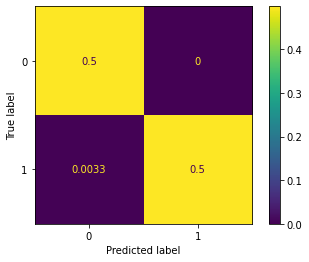

testing accuracy =  80.51948051948052


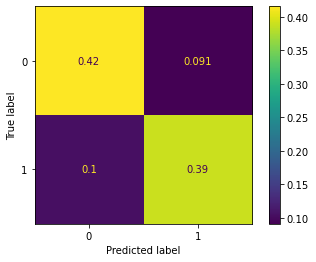

In [17]:
Logistic_Regression(X,y)

## Logistic regression MelSpec features

In [18]:
mel_data["Class"] = mel_data["Class"].replace({"Happy": 1,"Sad": 0})
X = mel_data.iloc[:,:-1]
y = mel_data.iloc[:,-1:]

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


training accuracy =  79.80456026058633


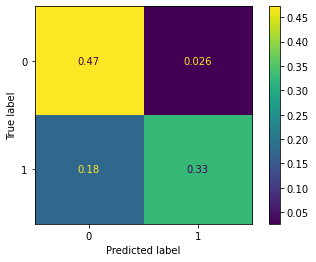

testing accuracy =  72.72727272727273


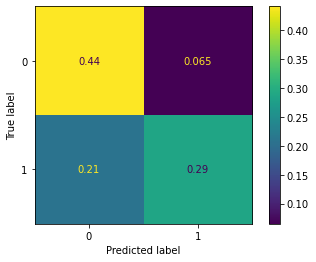

In [19]:
Logistic_Regression(X,y)

## CNN model Mfcc features

In [20]:
X = mfcc_data.iloc[:,0:128]
y = mfcc_data["Class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,
                                                        stratify = y)

In [21]:
X_train = np.array(X_train).reshape(X_train.shape[0],16,8,1)
X_test = np.array(X_test).reshape(X_test.shape[0],16,8,1)

In [23]:
tf.keras.backend.clear_session()
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(16, 8, 1)),
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu', padding = "same"),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu', padding = "same"),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])
model.summary()

2022-10-25 11:49:19.329805: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-25 11:49:19.339897: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-25 11:49:19.340649: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-25 11:49:19.341975: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 16, 8, 16)         160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 8, 4, 16)          0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 4, 16)          2320      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 2, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 16)                2064      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 1

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 16, 8, 16)         160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 8, 4, 16)          0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 4, 16)          2320      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 2, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 16)                2064      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 1

In [25]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='binary_crossentropy', metrics='accuracy')

In [26]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
history = model.fit(X_train, y_train, epochs=100,validation_data=(X_test,y_test),
                    callbacks=[callback])

Epoch 1/100


2022-10-25 11:49:20.471761: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2022-10-25 11:49:21.247938: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


10/10 [==============================] - 2s 25ms/step - loss: 2.7156 - accuracy: 0.4625 - val_loss: 0.8608 - val_accuracy: 0.5065
Epoch 2/100
10/10 [==============================] - 0s 5ms/step - loss: 1.0020 - accuracy: 0.5114 - val_loss: 0.5335 - val_accuracy: 0.7792
Epoch 3/100
10/10 [==============================] - 0s 5ms/step - loss: 0.7279 - accuracy: 0.5537 - val_loss: 0.6351 - val_accuracy: 0.5974
Epoch 4/100
10/10 [==============================] - 0s 5ms/step - loss: 0.6665 - accuracy: 0.6156 - val_loss: 0.5471 - val_accuracy: 0.7532
Epoch 5/100
10/10 [==============================] - 0s 5ms/step - loss: 0.6087 - accuracy: 0.6580 - val_loss: 0.5243 - val_accuracy: 0.7532
Epoch 6/100
10/10 [==============================] - 0s 5ms/step - loss: 0.5911 - accuracy: 0.6938 - val_loss: 0.5715 - val_accuracy: 0.6753
Epoch 7/100
10/10 [==============================] - 0s 6ms/step - loss: 0.5922 - accuracy: 0.6743 - val_loss: 0.5241 - val_accuracy: 0.7922
Epoch 8/100
10/10 [=====

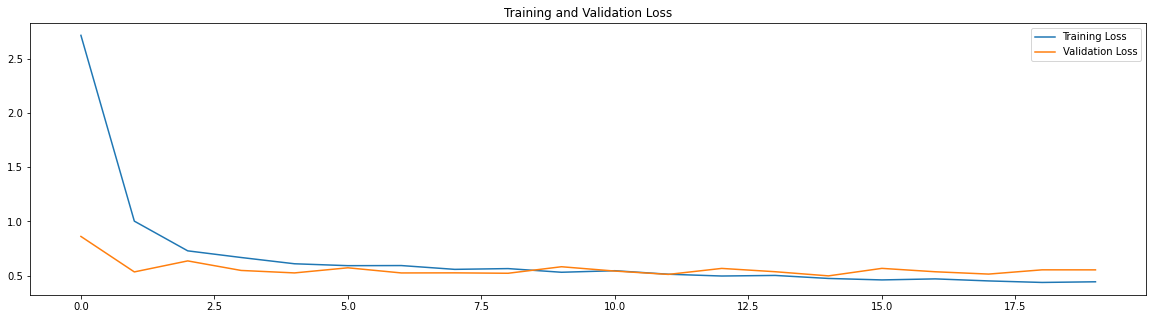

In [27]:
plt.figure(figsize=(20, 5))
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(loss, label='Training Loss')
plt.plot( val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [28]:
from sklearn.metrics import accuracy_score,log_loss, confusion_matrix,ConfusionMatrixDisplay

training accuracy =  78.50162866449512


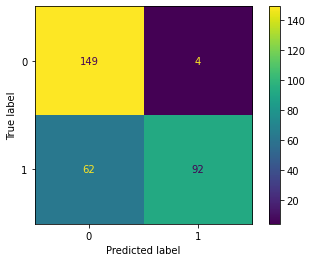

testing accuracy =  71.42857142857143


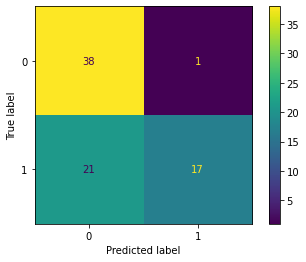

In [29]:
## prediction 
y_train_pred = np.where(model.predict(X_train) > 0.5, 1,0)
y_test_pred = np.where(model.predict(X_test) > 0.5, 1,0)
    
## Accuracy and Confusion Matrix
## training
print("training accuracy = ",accuracy_score(y_train,y_train_pred)*100)
ConfusionMatrixDisplay.from_predictions(y_train,y_train_pred)    
plt.show()
## testing
print("testing accuracy = ",accuracy_score(y_test,y_test_pred)*100)
ConfusionMatrixDisplay.from_predictions(y_test,y_test_pred)
plt.show()

## CNN on Melspec features

In [30]:
X = mel_data.iloc[:,0:128]
y = mel_data["Class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,
                                                        stratify = y)

In [31]:
X_train = np.array(X_train).reshape(X_train.shape[0],16,8,1)
X_test = np.array(X_test).reshape(X_test.shape[0],16,8,1)

In [32]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='binary_crossentropy', metrics='accuracy')

In [33]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
history1 = model.fit(X_train, y_train, epochs=100,validation_data=(X_test,y_test),
                    callbacks=[callback])

Epoch 1/100
10/10 [==============================] - 1s 20ms/step - loss: 0.6983 - accuracy: 0.6059 - val_loss: 0.6578 - val_accuracy: 0.7532
Epoch 2/100
10/10 [==============================] - 0s 5ms/step - loss: 0.6618 - accuracy: 0.7068 - val_loss: 0.6317 - val_accuracy: 0.7922
Epoch 3/100
10/10 [==============================] - 0s 5ms/step - loss: 0.6467 - accuracy: 0.6971 - val_loss: 0.6147 - val_accuracy: 0.7922
Epoch 4/100
10/10 [==============================] - 0s 5ms/step - loss: 0.6379 - accuracy: 0.6612 - val_loss: 0.6009 - val_accuracy: 0.7532
Epoch 5/100
10/10 [==============================] - 0s 5ms/step - loss: 0.6324 - accuracy: 0.6743 - val_loss: 0.5886 - val_accuracy: 0.7532
Epoch 6/100
10/10 [==============================] - 0s 5ms/step - loss: 0.6257 - accuracy: 0.6612 - val_loss: 0.5848 - val_accuracy: 0.7273
Epoch 7/100
10/10 [==============================] - 0s 5ms/step - loss: 0.6194 - accuracy: 0.6547 - val_loss: 0.5748 - val_accuracy: 0.7273
Epoch 8/100


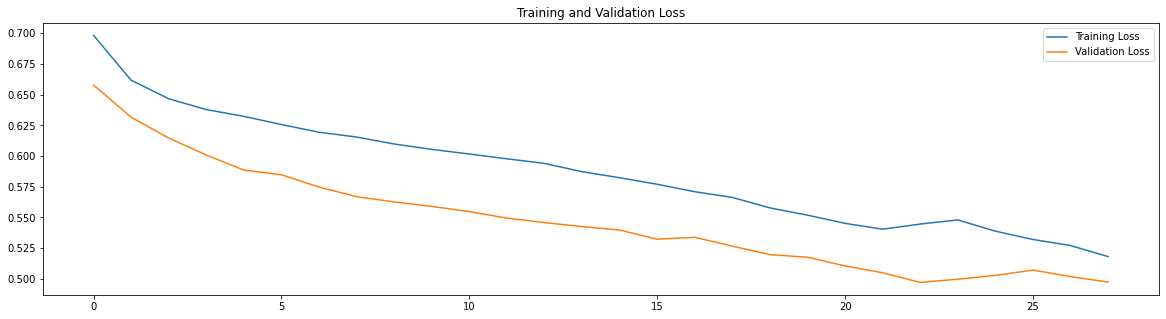

In [34]:
plt.figure(figsize=(20, 5))
loss = history1.history['loss']
val_loss = history1.history['val_loss']
plt.plot(loss, label='Training Loss')
plt.plot( val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

training accuracy =  72.63843648208469


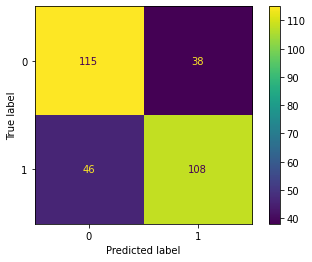

testing accuracy =  76.62337662337663


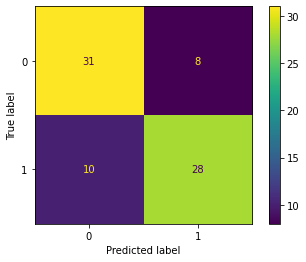

In [35]:
## prediction 
y_train_pred = np.where(model.predict(X_train) > 0.5, 1,0)
y_test_pred = np.where(model.predict(X_test) > 0.5, 1,0)
    
## Accuracy and Confusion Matrix
## training
print("training accuracy = ",accuracy_score(y_train,y_train_pred)*100)
ConfusionMatrixDisplay.from_predictions(y_train,y_train_pred)    
plt.show()
## testing
print("testing accuracy = ",accuracy_score(y_test,y_test_pred)*100)
ConfusionMatrixDisplay.from_predictions(y_test,y_test_pred)
plt.show()

**Inference:** MelSpec features using CNN give better performance then Mfcc features a

## Creating audio features for auto encoders

In [36]:
happy_files = []
sad_files = []
i = 0
l_happy = []
for dirname, _, filenames in os.walk('./'):
    if dirname == "./Happy":
        for filename in filenames:
            if filename.endswith(".wav"):
                happy_files.append(filename)
    if dirname == "./Sad":
        for filename in filenames:
            if filename.endswith(".wav"):
                sad_files.append(filename)
                

In [37]:
happy = []
sad = []
for i in happy_files:
    for j in sad_files:
        
        x = i[:-4]
        y = j[:-4]
        split_x = x.split('-') 
        split_y = y.split('-')
        
        
        
        if ((split_x[-1] == split_y[-1])and (split_x[-4] == split_y[-4]) and (split_x[-2] == split_y[-2])and (split_x[-3] == split_y[-3])):
            happy.append(i)
            sad.append(j)
    


In [38]:
happy_sad = pd.DataFrame()
happy_sad["happy"] = happy
happy_sad["sad"] = sad

In [39]:
happy_sad.head()

,happy,sad
0,03-01-03-01-02-01-03.wav,03-01-04-01-02-01-03.wav
1,03-01-03-02-02-02-09.wav,03-01-04-02-02-02-09.wav
2,03-01-03-02-02-01-24.wav,03-01-04-02-02-01-24.wav
3,03-01-03-01-01-01-03.wav,03-01-04-01-01-01-03.wav
4,03-01-03-01-01-01-12.wav,03-01-04-01-01-01-12.wav


In [40]:
happy_sad["happy"] = './Happy/' + happy_sad["happy"]
happy_sad["sad"] = './Sad/' + happy_sad["sad"]

In [41]:
happy_sad.head()

,happy,sad
0,./Happy/03-01-03-01-02-01-03.wav,./Sad/03-01-04-01-02-01-03.wav
1,./Happy/03-01-03-02-02-02-09.wav,./Sad/03-01-04-02-02-02-09.wav
2,./Happy/03-01-03-02-02-01-24.wav,./Sad/03-01-04-02-02-01-24.wav
3,./Happy/03-01-03-01-01-01-03.wav,./Sad/03-01-04-01-01-01-03.wav
4,./Happy/03-01-03-01-01-01-12.wav,./Sad/03-01-04-01-01-01-12.wav


In [42]:
train, test = train_test_split(happy_sad, test_size=0.20)

In [43]:
file_count = 0
train_happy_feature = []
for count_, path in zip(range(train.shape[0]), train['happy'].values):
    x , sr = librosa.load(path)
    mfcc = librosa.feature.mfcc(y=x, sr=sr,n_fft = 256, n_mfcc=20)
    mfcc_t = mfcc.T
    N = mfcc_t.size
    if mfcc_t.shape != (256,20):
        mfcc_t = np.pad(mfcc_t, ((0,(256-mfcc_t.shape[0])),(0,0)), mode='constant')
    train_happy_feature.append(mfcc_t)
    count_ += 1

/opt/conda/lib/python3.7/site-packages/librosa/util/decorators.py:88: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  return f(*args, **kwargs)


In [44]:
train_sad_feature = []
for count_, path in zip(range(train.shape[0]), train['sad'].values):
    x , sr = librosa.load(path)
    mfcc = librosa.feature.mfcc(y=x, sr=sr,n_fft = 256, n_mfcc=20)
    mfcc_t = mfcc.T
    N = mfcc_t.size
    if mfcc_t.shape != (256,20):
        mfcc_t = np.pad(mfcc_t, ((0,(256-mfcc_t.shape[0])),(0,0)), mode='constant')
    train_sad_feature.append(mfcc_t)
    count_ += 1

In [45]:
file_count = 0
test_happy_feature = []
for count_, path in zip(range(test.shape[0]), test['happy'].values):
    x , sr = librosa.load(path)
    mfcc = librosa.feature.mfcc(y=x, sr=sr,n_fft = 256, n_mfcc=20)
    mfcc_t = mfcc.T
    N = mfcc_t.size
    if mfcc_t.shape != (256,20):
        mfcc_t = np.pad(mfcc_t, ((0,(256-mfcc_t.shape[0])),(0,0)), mode='constant')
    test_happy_feature.append(mfcc_t)
    count_ += 1

In [46]:
file_count = 0
test_sad_feature = []
for count_, path in zip(range(test.shape[0]), test['sad'].values):
    x , sr = librosa.load(path)
    mfcc = librosa.feature.mfcc(y=x, sr=sr,n_fft = 256, n_mfcc=20)
    mfcc_t = mfcc.T
    N = mfcc_t.size
    if mfcc_t.shape != (256,20):
        mfcc_t = np.pad(mfcc_t, ((0,(256-mfcc_t.shape[0])),(0,0)), mode='constant')
    test_sad_feature.append(mfcc_t)
    count_ += 1

In [47]:
np.array(test_happy_feature).shape,np.array(test_sad_feature).shape

((39, 256, 20), (39, 256, 20))

In [48]:
np.array(train_happy_feature).shape,np.array(train_sad_feature).shape

((153, 256, 20), (153, 256, 20))

In [49]:
train_happy_feature = np.array(train_happy_feature).reshape(153,256,20,1)
train_sad_feature = np.array(train_sad_feature).reshape(153,256,20,1)
test_happy_feature = np.array(test_happy_feature).reshape(39,256,20,1)
test_sad_feature = np.array(test_sad_feature).reshape(39,256,20,1)

## Autoencoders

In [51]:
tf.keras.backend.clear_session()
class SpeechAE(tf.keras.models.Model):
    def __init__(self):
        super(SpeechAE, self).__init__()
        self.encoder = tf.keras.Sequential([
        tf.keras.layers.InputLayer(input_shape=(256, 20, 1)),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        tf.keras.layers.MaxPooling2D(2, 2)])

        self.decoder = tf.keras.Sequential([
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        tf.keras.layers.UpSampling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        tf.keras.layers.UpSampling2D((2, 2)),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        tf.keras.layers.Conv2D(1, kernel_size=(3, 3), activation='sigmoid', padding='same')])

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

autoencoder = SpeechAE()

In [52]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [53]:
history = autoencoder.fit(train_happy_feature, train_happy_feature, epochs=20,
                         validation_data = (test_happy_feature,test_sad_feature))

Epoch 1/20
5/5 [==============================] - 2s 223ms/step - loss: -8875.7490 - val_loss: -54110.9688
Epoch 2/20
5/5 [==============================] - 0s 28ms/step - loss: -178879.4844 - val_loss: -679130.0625
Epoch 3/20
5/5 [==============================] - 0s 29ms/step - loss: -1605697.2500 - val_loss: -4873203.5000
Epoch 4/20
5/5 [==============================] - 0s 29ms/step - loss: -9600412.0000 - val_loss: -24999228.0000
Epoch 5/20
5/5 [==============================] - 0s 27ms/step - loss: -44044880.0000 - val_loss: -101769904.0000
Epoch 6/20
5/5 [==============================] - 0s 27ms/step - loss: -164493600.0000 - val_loss: -350396992.0000
Epoch 7/20
5/5 [==============================] - 0s 28ms/step - loss: -534103680.0000 - val_loss: -1059732480.0000
Epoch 8/20
5/5 [==============================] - 0s 27ms/step - loss: -1535992704.0000 - val_loss: -2886916608.0000
Epoch 9/20
5/5 [==============================] - 0s 27ms/step - loss: -4005263104.0000 - val_loss:

In [54]:
a = train_happy_feature[1]
np.array(a).shape

(256, 20, 1)

In [55]:
sample = np.array(test_happy_feature[0]).reshape(1,256,20,1)
encoded_sample = autoencoder.encoder(sample).numpy()
decoded_sample = autoencoder.decoder(encoded_sample).numpy()
decoded_sample.shape

(1, 256, 20, 1)

In [56]:
mfcc_x = librosa.feature.inverse.mfcc_to_audio(decoded_sample.reshape(256, 20))
soundfile.write('example.wav', mfcc_x, 20000)

In [57]:
ipd.Audio('example.wav')

## Variational Autoencoder

In [59]:
class Sampling(layers.Layer):
    """Uses (z_mean, z_log_var) to sample z, the vector encoding a digit."""

    def call(self, inputs):
        z_mean, z_log_var = inputs
        batch = tf.shape(z_mean)[0]
        dim = tf.shape(z_mean)[1]
        epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon

In [74]:
latent_dim = 2

encoder_inputs = keras.Input(shape=(256, 20, 1))
x = layers.Conv2D(32, 3, activation="relu", strides=2, padding="same")(encoder_inputs)
x = layers.Conv2D(64, 3, activation="relu", strides=2, padding="same")(x)
x = layers.Flatten()(x)
x = layers.Dense(16, activation="relu")(x)
z_mean = layers.Dense(latent_dim, name="z_mean")(x)
z_log_var = layers.Dense(latent_dim, name="z_log_var")(x)
z = Sampling()([z_mean, z_log_var])
encoder = keras.Model(encoder_inputs, [z_mean, z_log_var, z], name="encoder")
encoder.summary()

Model: "encoder"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 256, 20, 1)] 0                                            
__________________________________________________________________________________________________
conv2d_8 (Conv2D)               (None, 128, 10, 32)  320         input_4[0][0]                    
__________________________________________________________________________________________________
conv2d_9 (Conv2D)               (None, 64, 5, 64)    18496       conv2d_8[0][0]                   
__________________________________________________________________________________________________
flatten_1 (Flatten)             (None, 20480)        0           conv2d_9[0][0]                   
____________________________________________________________________________________________

In [75]:
latent_inputs = keras.Input(shape=(latent_dim,))
x = layers.Dense(64 * 5 * 64, activation="relu")(latent_inputs)
x = layers.Reshape((64, 5, 64))(x)
x = layers.Conv2DTranspose(64, 3, activation="relu", strides=2, padding="same")(x)
x = layers.Conv2DTranspose(32, 3, activation="relu", strides=2, padding="same")(x)
decoder_outputs = layers.Conv2DTranspose(1, 3, activation="sigmoid", padding="same")(x)
decoder = keras.Model(latent_inputs, decoder_outputs, name="decoder")
decoder.summary()

Model: "decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 2)]               0         
_________________________________________________________________
dense_3 (Dense)              (None, 20480)             61440     
_________________________________________________________________
reshape_1 (Reshape)          (None, 64, 5, 64)         0         
_________________________________________________________________
conv2d_transpose_3 (Conv2DTr (None, 128, 10, 64)       36928     
_________________________________________________________________
conv2d_transpose_4 (Conv2DTr (None, 256, 20, 32)       18464     
_________________________________________________________________
conv2d_transpose_5 (Conv2DTr (None, 256, 20, 1)        289       
Total params: 117,121
Trainable params: 117,121
Non-trainable params: 0
_____________________________________________________

In [76]:
class VAE(keras.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super(VAE, self).__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
        self.total_loss_tracker = keras.metrics.Mean(name="total_loss")
        self.reconstruction_loss_tracker = keras.metrics.Mean(
            name="reconstruction_loss"
        )
        self.kl_loss_tracker = keras.metrics.Mean(name="kl_loss")

    @property
    def metrics(self):
        return [
            self.total_loss_tracker,
            self.reconstruction_loss_tracker,
            self.kl_loss_tracker,
        ]

    def train_step(self, data):
        
        with tf.GradientTape() as tape:
            z_mean, z_log_var, z = self.encoder(data)
            reconstruction = self.decoder(z)
            reconstruction_loss = tf.reduce_mean(
                tf.reduce_sum(
                    keras.losses.binary_crossentropy(data, reconstruction), axis=(1, 2)
                )
            )
            kl_loss = -0.5 * (1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var))
            kl_loss = tf.reduce_mean(tf.reduce_sum(kl_loss, axis=1))
            total_loss = reconstruction_loss + kl_loss
        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        self.total_loss_tracker.update_state(total_loss)
        self.reconstruction_loss_tracker.update_state(reconstruction_loss)
        self.kl_loss_tracker.update_state(kl_loss)
        return {
            "loss": self.total_loss_tracker.result(),
            "reconstruction_loss": self.reconstruction_loss_tracker.result(),
            "kl_loss": self.kl_loss_tracker.result(),
        }
    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

In [77]:
vae = VAE(encoder, decoder)
vae.compile(optimizer=keras.optimizers.Adam())

In [78]:
history = vae.fit(train_happy_feature,
                   epochs=20)

Epoch 1/20
5/5 [==============================] - 1s 9ms/step - loss: -2943.6825 - reconstruction_loss: -33005.5742 - kl_loss: 21455.3906
Epoch 2/20
5/5 [==============================] - 0s 9ms/step - loss: -52989.9580 - reconstruction_loss: -622874.3125 - kl_loss: 558211.9375
Epoch 3/20
5/5 [==============================] - 0s 10ms/step - loss: -12727.9271 - reconstruction_loss: -12355.7842 - kl_loss: 3.0301
Epoch 4/20
5/5 [==============================] - 0s 9ms/step - loss: -139973.1468 - reconstruction_loss: -1115508.7500 - kl_loss: 912655.0000
Epoch 5/20
5/5 [==============================] - 0s 9ms/step - loss: -155567.8021 - reconstruction_loss: -143706.2031 - kl_loss: 297.3375
Epoch 6/20
5/5 [==============================] - 0s 9ms/step - loss: -827604.3333 - reconstruction_loss: -1738071.2500 - kl_loss: 40641.0195
Epoch 7/20
5/5 [==============================] - 0s 9ms/step - loss: 93208212.6667 - reconstruction_loss: -45190552.0000 - kl_loss: 89153808.0000
Epoch 8/20
5/5

In [79]:
a = train_happy_feature[1]
np.array(a).shape

(256, 20, 1)

In [80]:
sample = np.array(test_happy_feature[0]).reshape(1,256,20,1)
#decoded_sample = vae.predict(sample)
z_mean, z_log_var, z = vae.encoder(sample)
decoded_sample = vae.decoder(z).numpy()
decoded_sample.shape

(1, 256, 20, 1)

In [81]:
mfcc_x = librosa.feature.inverse.mfcc_to_audio(decoded_sample.reshape(256, 20))
soundfile.write('example1.wav', mfcc_x, 20000)

In [82]:
ipd.Audio('example.wav')

**Inference:** However the autoencoder was not able to recreate the audio files but an approach to do so can be used as reference and maybe considering different feature as input or making some changes in the model may help